In [72]:
import pandas as pd

In [73]:
teams=pd.read_csv("teams.csv")


In [74]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [75]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [76]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [77]:
import seaborn as sns

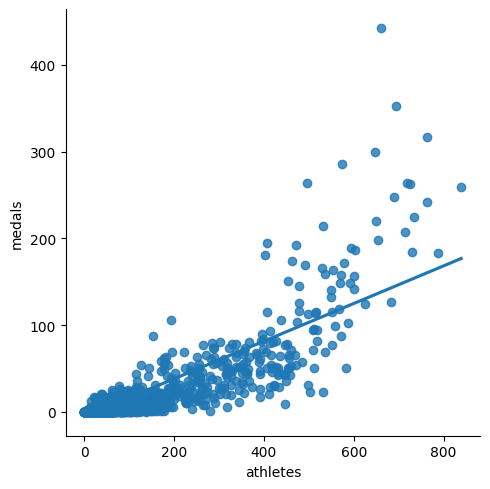

In [78]:
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

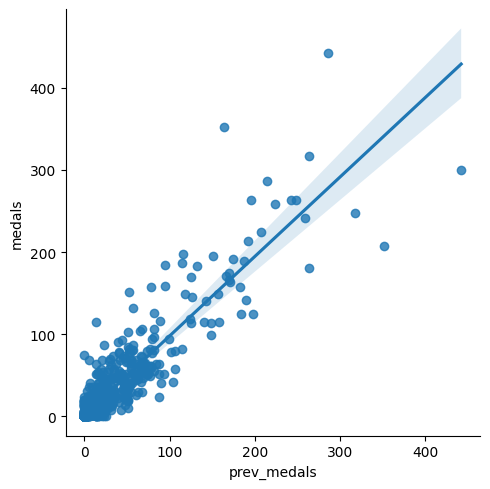

In [79]:
sns.lmplot(x="prev_medals",y="medals",data=teams,fit_reg=True,ci=95)#ci=confidence interval

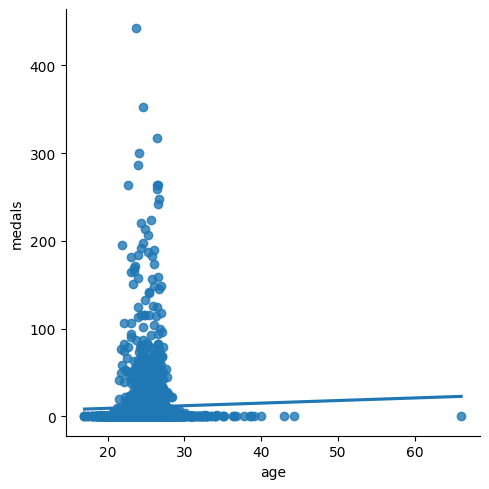

In [80]:
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

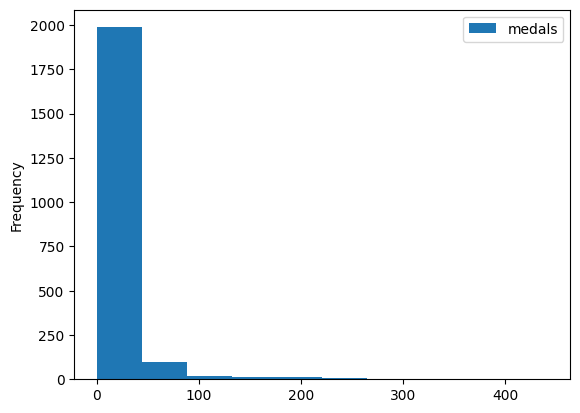

In [81]:
teams.plot.hist(y="medals")

In [82]:
filtered=teams[(teams["age"]>=18) & (teams["age"]<=27)] 

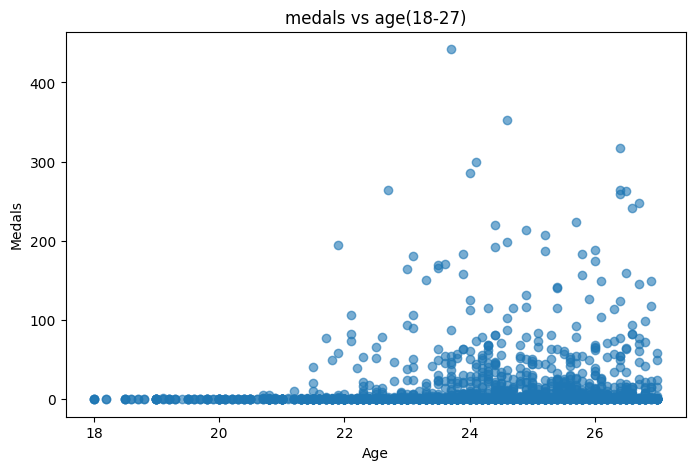

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(filtered["age"],filtered["medals"],alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Medals")
plt.title("medals vs age(18-27)")
plt.show()

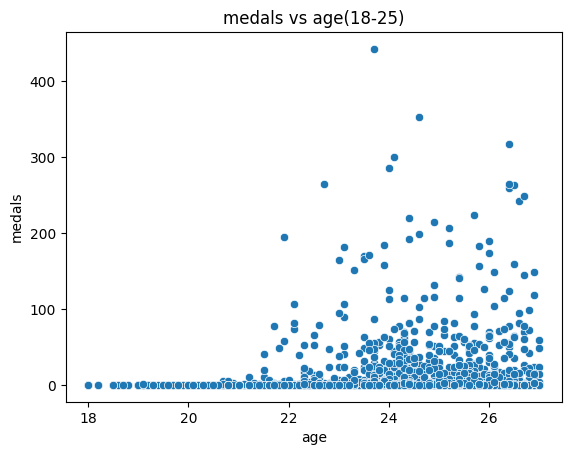

In [84]:
sns.scatterplot(x="age",y="medals",data=filtered)
plt.title("medals vs age(18-25)")
plt.show()

C:\Users\merry\AppData\Local\Temp\ipykernel_7644\839251235.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="age",y="medals",data=filtered,ci=None)


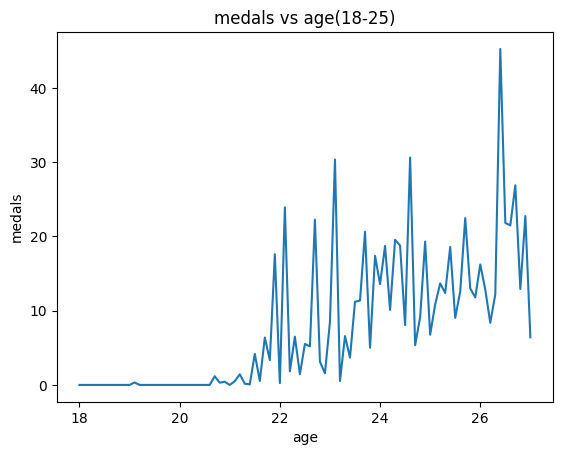

In [85]:
sns.lineplot(x="age",y="medals",data=filtered,ci=None)
plt.title("medals vs age(18-25)")
plt.show()

C:\Users\merry\AppData\Local\Temp\ipykernel_7644\4013649756.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_medals = teams.groupby("age_bin")["medals"].mean().reset_index()


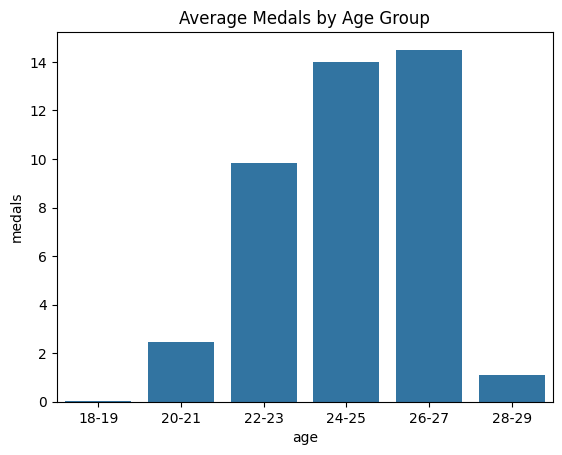

In [86]:
bins = [18, 20, 22, 24, 26,28,30]  # Bin edges
labels = ["18-19", "20-21", "22-23", "24-25","26-27","28-29"]

teams["age_bin"] = pd.cut(teams["age"], bins=bins, labels=labels)

avg_medals = teams.groupby("age_bin")["medals"].mean().reset_index()

sns.barplot(x="age_bin", y="medals", data=avg_medals)
plt.title("Average Medals by Age Group")
plt.xlabel("age")
plt.ylabel("medals")
plt.show()


In [87]:
teams=teams.drop("age_bin",axis=1)
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [88]:
teams=teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [89]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()


In [90]:
train.shape

(1609, 7)

In [91]:
test.shape

(405, 7)

In [92]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [93]:
predictors=["athletes","prev_medals"]
target="medals"

In [94]:
reg.fit(train[predictors],train["medals"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
predictions=reg.predict(test[predictors])


In [96]:
test["predictions"]=predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [97]:
test.loc[test["predictions"]<0,"predictions"]=0#convert all negative values to 0
test["predictions"]=test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [98]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test["medals"],test["predictions"])


In [99]:
error

3.2987654320987656

In [100]:
teams.describe()["medals"]#error should be lesser than std

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [101]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [102]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [103]:
errors=(test["medals"]-test["predictions"]).abs()

In [104]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [105]:
error_by_team=errors.groupby(test["team"]).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [106]:
medals_by_team=test["medals"].groupby(test["team"]).mean()

In [107]:
error_ratio=error_by_team/medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [108]:
error_ratio[~pd.isnull(error_ratio)]#remove nan values(0/0)

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [109]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]#remove inf values
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

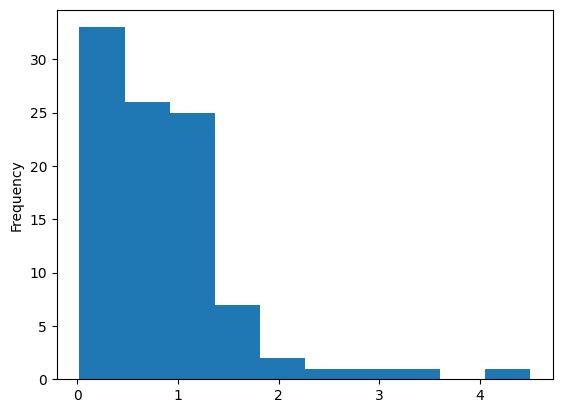

In [110]:
error_ratio.plot.hist()

In [111]:
error_ratio.sort_values()


team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64